In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [41]:
from google.colab import files 
uploaded=files.upload()

Saving Coca.xlsx to Coca.xlsx


In [42]:
excel_file = pd.read_excel('Coca.xlsx')
csv_data = excel_file.to_csv(index=False)
with open('Coca.csv', 'w') as f:
    f.write(csv_data)
print("Excel file converted to CSV successfully.")


Excel file converted to CSV successfully.


In [43]:
Coca = pd.read_csv('Coca.csv')

In [44]:
Coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [45]:
Coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<Axes: >

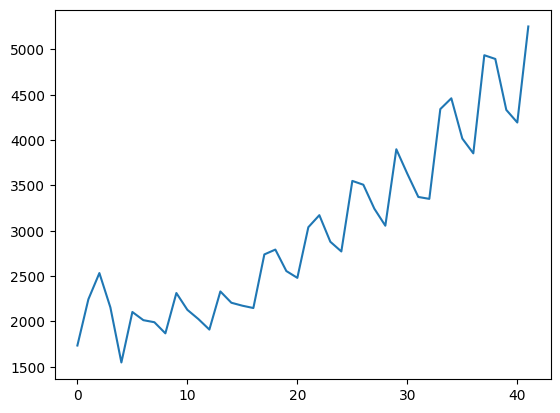

In [46]:
Coca.Sales.plot()

In [47]:
len(Coca['Sales'])

42

# Splitting data

In [48]:
Train = Coca.head(147)
Test = Coca.tail(12)

# Moving Average 

In [49]:
list(range(2,24,6))

[2, 8, 14, 20]

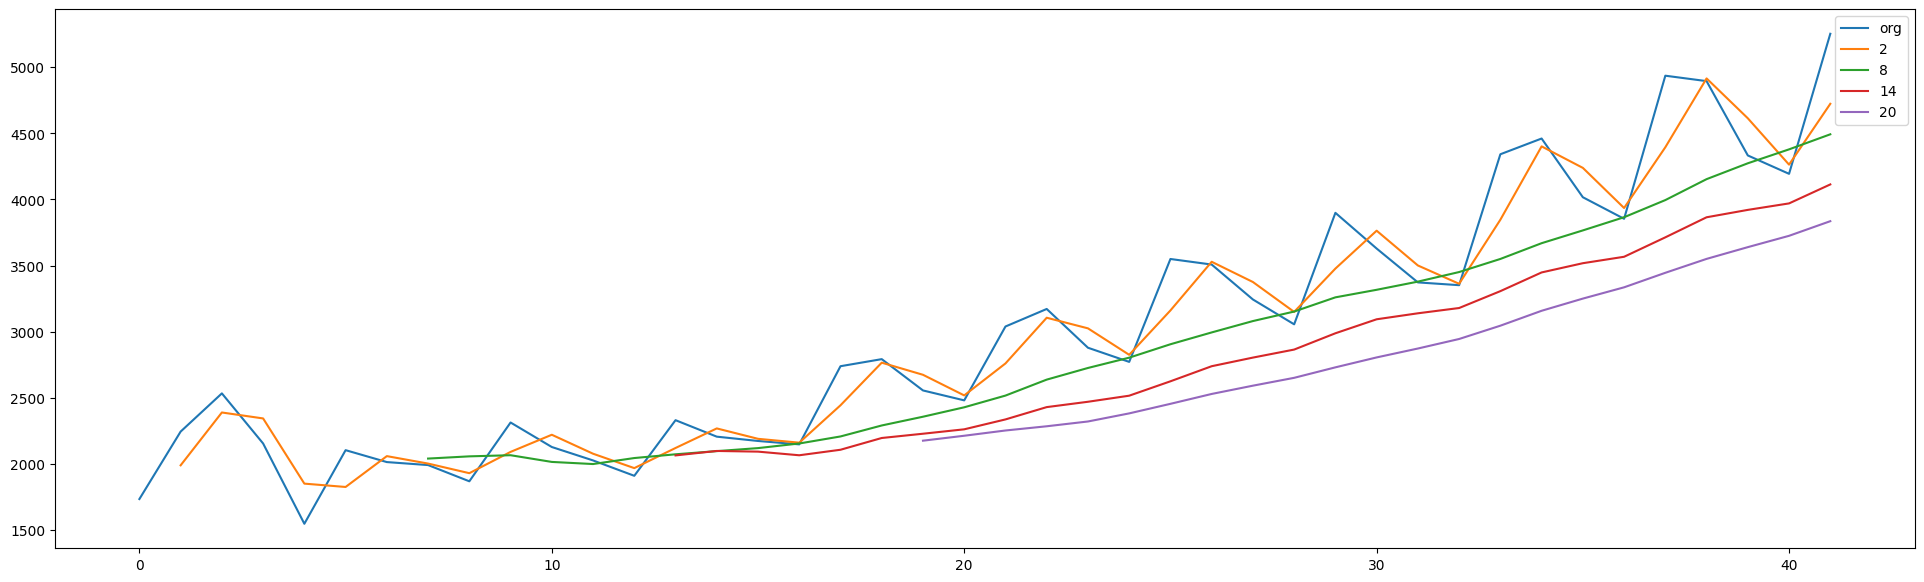

In [51]:
plt.figure(figsize=(24,7))
Coca.Sales.plot(label="org")
for i in range(2,24,6):
    Coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


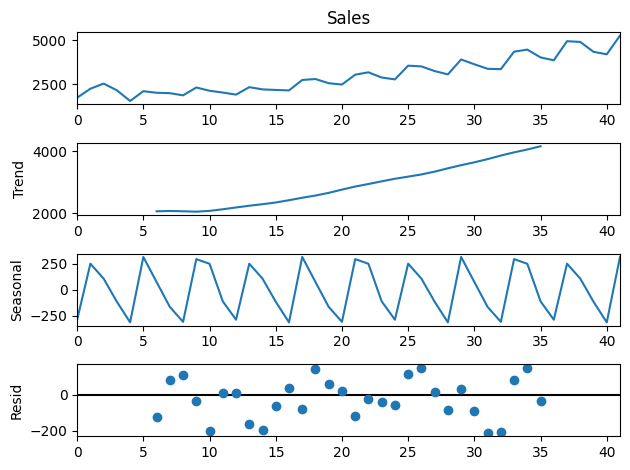

In [52]:
decompose_ts_add = seasonal_decompose(Coca.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


A partial autocorrelation (PACF) is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


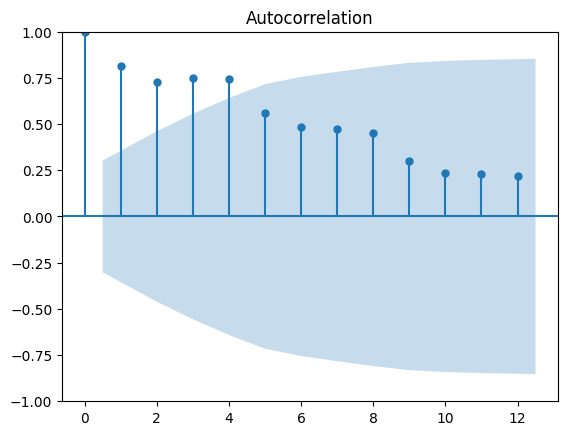

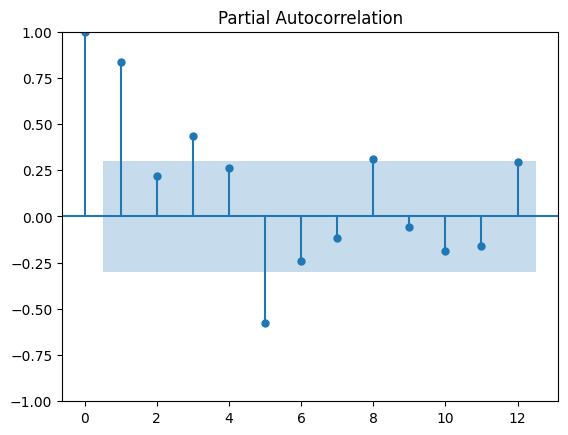

In [53]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Coca.Sales,lags=12)
tsa_plots.plot_pacf(Coca.Sales,lags=12)
plt.show()

### Evaluation Metric MAPE

In [56]:
#Mean Absolute Percentage Error
def MAPE(pred,org):
    Quarter = np.abs((pred-org)/org)*100
    return np.mean(Quarter)

In [57]:
#Weighted Moving Average
import pandas as pd
import numpy as np 
df = pd.DataFrame({'X':range(100,30, -5)})
Quarter = np.array([0.1, 0.2, 0.3, 0.4])
df['MA'] = df['X'].rolling(4).apply(lambda x: np.sum(Month*x))
df

,X,MA
0,100,NaN
1,95,NaN
2,90,NaN
3,85,90.0
4,80,85.0
5,75,80.0
6,70,75.0
7,65,70.0
8,60,65.0
9,55,60.0


In [58]:
df=pd.DataFrame()
df['Sales']=Coca["Sales"]
df['WMA'] = df['Sales'].rolling(4).apply(lambda x: np.sum(Month*x))
df

,Sales,WMA
0,1734.827000,NaN
1,2244.960999,NaN
2,2533.804993,NaN
3,2154.962997,2244.601596
4,1547.818996,1996.873596
5,2104.411995,1990.483596
6,2014.362999,1962.128897
7,1991.746998,1976.671997
8,1869.049999,1958.457898
9,2313.631996,2085.953498


### Simple Exponential Method


In [59]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

11.039054479141752

### Holt method 

In [60]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

<ipython-input-60-8b6f962a88ff>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.454382202236758

### Holts winter exponential smoothing with additive seasonality and additive trend


In [61]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

3.8602329930165915

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [62]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

1.693319879821541

## Final Model by combining train and test

In [63]:
hwe_model_add_add = ExponentialSmoothing(Coca["Sales"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit()

In [64]:
#Forecasting for next 10 Quarters periods
hwe_model_add_add.forecast(10)

42    5055.589483
43    4924.001791
44    4880.220023
45    5562.056816
46    5598.398096
47    5337.880792
48    5235.977333
49    5978.641040
50    6047.541709
51    5763.826183
dtype: float64